In [39]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cf

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

In [3]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_DOWN')

In [4]:
lon_min, lon_max, lat_min, lat_max, area = 6.5, 19, 36.5, 48, 'ITALY'

In [5]:
DATA = xr.open_dataset(os.path.join(dir_base, 'ITALY_DOWN_GSMaP_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc'))
lons = DATA.lon.values
lats = DATA.lat.values
lon2d, lat2d = np.meshgrid(lons, lats)

Tr = DATA.Tr.values
Mev_d_MAR = DATA.Mev_d.values[3,:,:]

del DATA

In [6]:
DATA = xr.open_dataset(os.path.join(dir_base, 'ITALY_DOWN_GSMaP_3h_2002_2023_npix_2_thr_1_acf_str_genetic_pearson.nc'))
Mev_d_STR = DATA.Mev_d.values[3,:,:]

In [25]:
DATA = xr.open_dataset(os.path.join(dir_base, 'ITALY_DOWN_GSMaP_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_NoCorrection.nc'))
Mev_d_OLD = DATA.Mev_d.values[3,:,:]
Mev_d_OLD = np.where(Mev_d_OLD>=700, 500, Mev_d_OLD)

In [26]:
val_min = np.min([np.nanmin(Mev_d_MAR),np.nanmin(Mev_d_STR),np.nanmin(Mev_d_OLD)])
val_max = np.max([np.nanmax(Mev_d_MAR),np.nanmax(Mev_d_STR),np.nanmax(Mev_d_OLD)])
print(val_min, val_max)

48.051560229923105 643.2150447965913


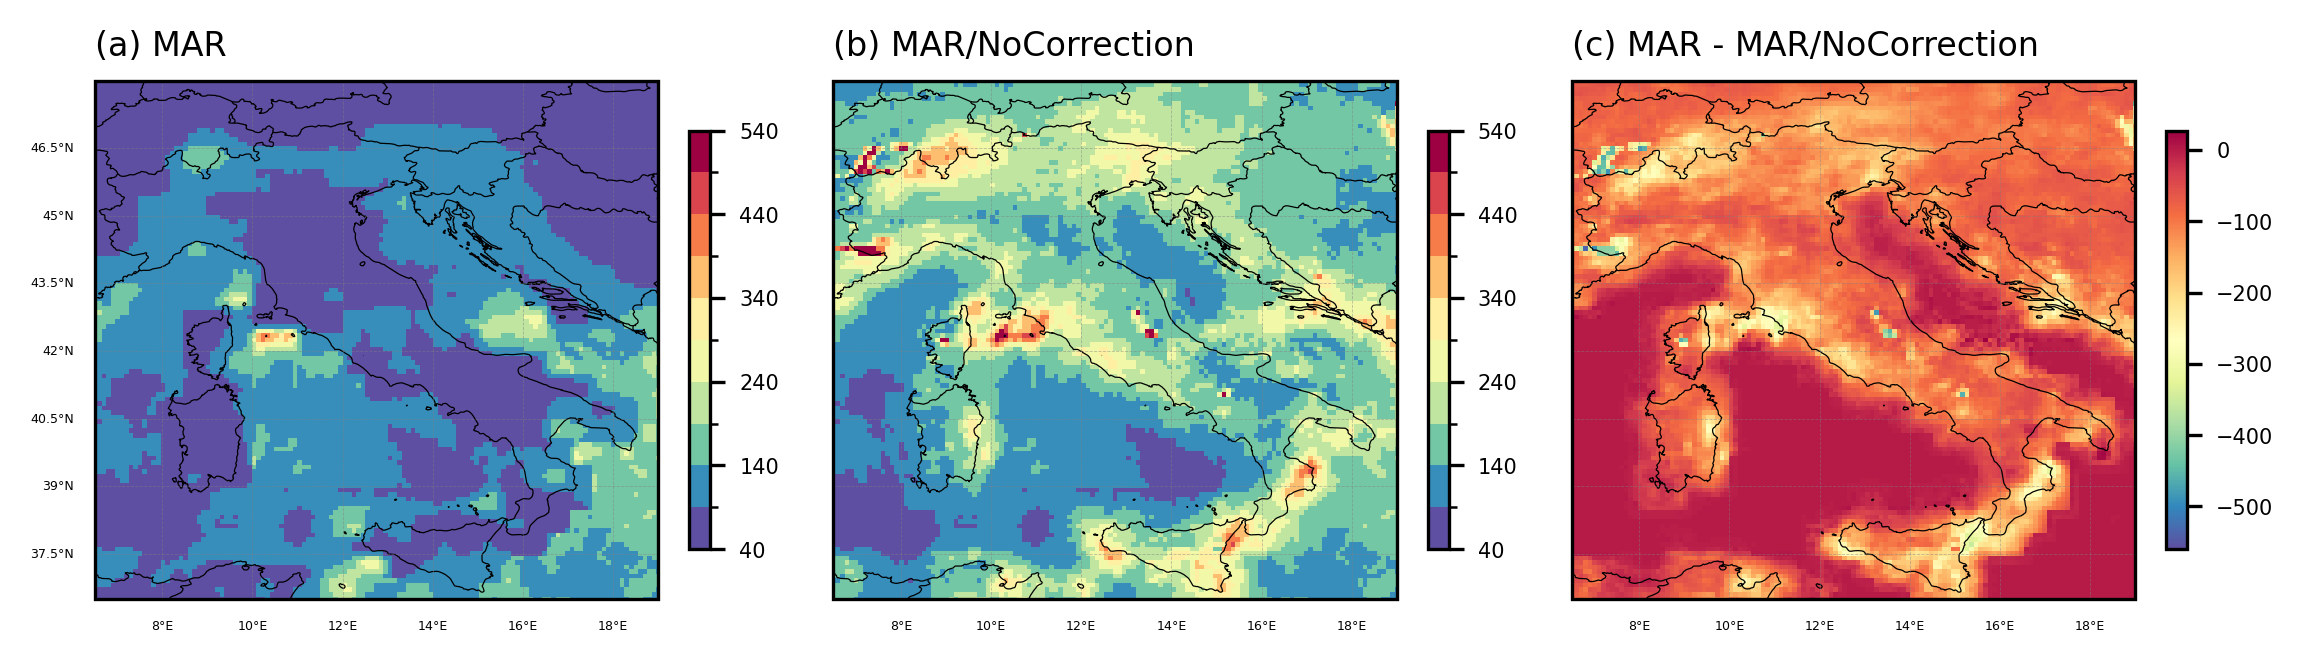

In [31]:
levels = np.arange(40, 550, 50)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,3)

# ======================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.3,edgecolor='k')
ax1.add_feature(cf.BORDERS,linewidth=0.3,edgecolor='black',zorder=4)

a1 = ax1.pcolormesh(lon2d, lat2d, Mev_d_MAR, cmap=cmap, norm=norm)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.034)
cbar.ax.tick_params(labelsize=5)

ax1.set_title('(a) MAR', fontsize=8, loc='left')

# ======================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.3,edgecolor='k')
ax1.add_feature(cf.BORDERS,linewidth=0.3,edgecolor='black',zorder=4)

a1 = ax1.pcolormesh(lon2d, lat2d, Mev_d_OLD, cmap=cmap, norm=norm)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.034)
cbar.ax.tick_params(labelsize=5)

ax1.set_title('(b) MAR/NoCorrection', fontsize=8, loc='left')

# ======================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.3,edgecolor='k')
ax1.add_feature(cf.BORDERS,linewidth=0.3,edgecolor='black',zorder=4)

a1 = ax1.pcolormesh(lon2d, lat2d, Mev_d_MAR-Mev_d_OLD, cmap=cmap, norm=None)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 3, 'color': 'k'}
gl.ylabel_style = {'size': 3, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.034)
cbar.ax.tick_params(labelsize=5)

ax1.set_title('(c) MAR - MAR/NoCorrection', fontsize=8, loc='left')

# ======================================================================================
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.1, wspace=0.2)

## Compare Errors

In [36]:
def extract_all_quantiles(product):
    dir_base = os.path.join('/','media','arturo','T9','Data','Italy')
    hdf5_file = os.path.join(dir_base,'statistics',f'statistics_obs_{product}.h5')
    data = pd.HDFStore(hdf5_file, mode='r')

    all_keys = data.keys()
    all_QUANTILES = [k for k in all_keys if k.endswith("/QUANTILES")]
    
    RE_raw = []
    RE_down = []

    for nn in range(len(all_QUANTILES)):
        DICT = data[all_QUANTILES[nn]]
        RE_raw_ = DICT.RE_raw.values[3]
        RE_down_ = DICT.RE_down.values[3]
    
        RE_raw.append(RE_raw_)
        RE_down.append(RE_down_)
    
    RE_raw = np.array(RE_raw)
    RE_down = np.array(RE_down)
    
    RE_raw = np.where(RE_raw >= 1.3, np.nan, RE_raw)
    RE_down = np.where(RE_down >= 1.3, np.nan, RE_down)
    
    return RE_raw, RE_down

In [43]:
CMORPH_RE_raw, CMORPH_RE_down = extract_all_quantiles('CMORPH')

In [ ]:
CMORPH_RE_raw, CMORPH_RE_down = extract_all_quantiles('CMORPH')

GSMaP_RE_raw, GSMaP_RE_down = extract_all_quantiles('GSMaP')
GSMaP_RE_raw_NC, GSMaP_RE_down_NC = extract_all_quantiles('GSMaP_NoCorrection')

ENSEMBLE_RE_raw, ENSEMBLE_RE_down = extract_all_quantiles('ENSEMBLE_mean')

In [38]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

Text(0.0, 1.0, '(a)')

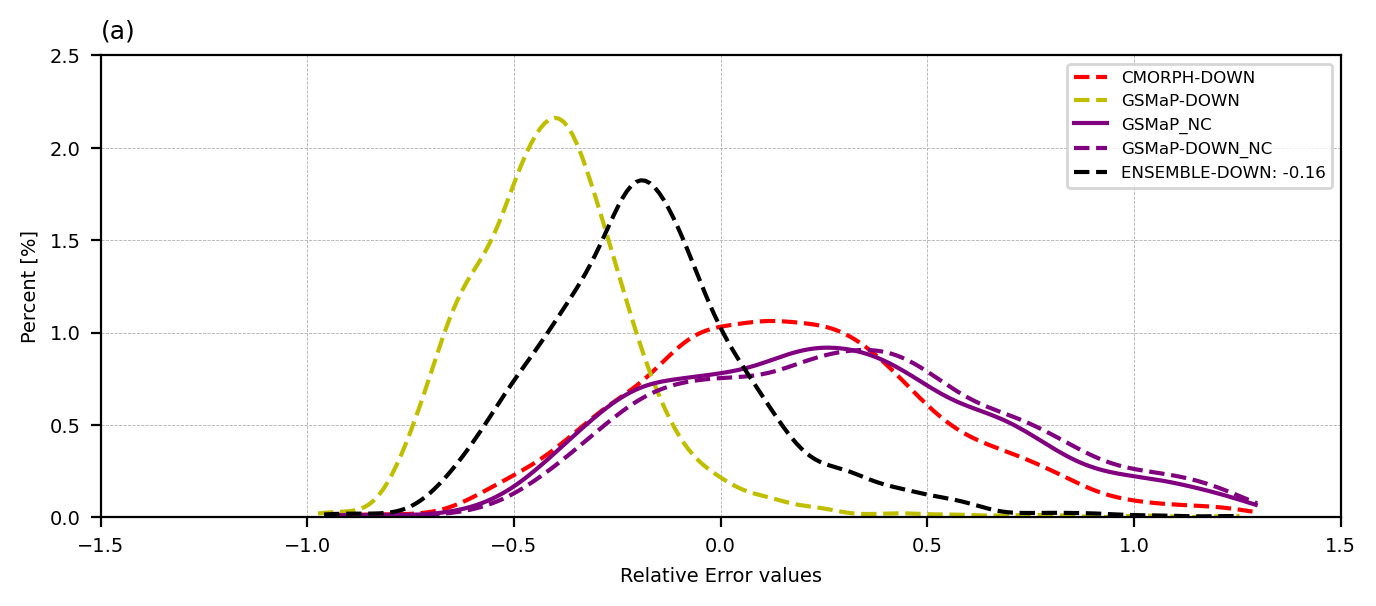

In [44]:
fig = plt.figure(figsize=(8,3),dpi=200)
gs = gridspec.GridSpec(1,1)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(CMORPH_RE_down,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH-DOWN',
            clip=(np.nanmin(np.array(CMORPH_RE_down)), np.nanmax(np.array(CMORPH_RE_down))))

# sns.kdeplot(GSMaP_RE_raw,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP',
#             clip=(np.nanmin(np.array(GSMaP_RE_raw)), np.nanmax(np.array(GSMaP_RE_raw))))
sns.kdeplot(GSMaP_RE_down,color=colors[4], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP-DOWN',
            clip=(np.nanmin(np.array(GSMaP_RE_down)), np.nanmax(np.array(GSMaP_RE_down))))

sns.kdeplot(GSMaP_RE_raw_NC,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP_NC',
            clip=(np.nanmin(np.array(GSMaP_RE_raw_NC)), np.nanmax(np.array(GSMaP_RE_raw_NC))))
sns.kdeplot(GSMaP_RE_down_NC,color=colors[5], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP-DOWN_NC',
            clip=(np.nanmin(np.array(GSMaP_RE_down_NC)), np.nanmax(np.array(GSMaP_RE_down_NC))))

# sns.kdeplot(ENSEMBLE_RE_raw,color='k',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-SAT: {np.round(np.nanmean(ENSEMBLE_RE_raw),2)}',
#             clip=(np.nanmin(np.array(ENSEMBLE_RE_raw)), np.nanmax(np.array(ENSEMBLE_RE_raw))))
sns.kdeplot(ENSEMBLE_RE_down,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(ENSEMBLE_RE_down),2)}',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_down)), np.nanmax(np.array(ENSEMBLE_RE_down))))


ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(a)',fontsize=9, loc='left')